### Marcelo R Stachuk

Aqui vamos fazer a continuação do notebook escolas2017_xgboost. Vamos fazer tratamentos de dados parecidos, porem vamos engenheirar novas features e vamos ignorar toda feature que tem a ve com localidade e rendimento passado. A idéia nesse notebook é encontrar features próprias da escola que pode nos dizer que a escola vai apresentar um rendimento alto

## Captação de dados dos anos iniciais e Criação de Features

### Importando biblíotecas

In [72]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

### Captando dados
Primeiro faremos passos similares ao notebook anterior

In [73]:
pd_escolas2017_iniciais = pd.read_csv('./escolas2017_anosIniciais.csv', encoding='latin-1')

/home/marcelostachuk/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (223,224) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [74]:
#Agora vamos separar os 20% melhores no IDEB
pd_escolas2017_iniciais = pd_escolas2017_iniciais.sort_values(by = 'Ideb2017', ascending=False)

pd_escolas2017_iniciais['isTop25'] = pd_escolas2017_iniciais.Ideb2017.apply(lambda x: x > 6.3)
pd_escolas2017_iniciais.head()

,cod_escola_inep,regiao,unidade_federativa,mesoregiao,microregiao,municipio,tp_dependencia,tp_dependencia_desc,tp_rede_publica,rede_publica_desc,...,Ideb2017,ProjecaoIdeb2007,ProjecaoIdeb2009,ProjecaoIdeb2011,ProjecaoIdeb2013,ProjecaoIdeb2015,ProjecaoIdeb2017,ProjecaoIdeb2019,ProjecaoIdeb2021,isTop25
14323,27042863,Nordeste,Alagoas,Leste Alagoano,SÃÂ£o Miguel dos Campos,Coruripe,3,Municipal,True,pÃÂºblica,...,9.9,NaN,NaN,4.4,4.7,4.9,5.2,5.5,5.8,True
9796,23220058,Nordeste,CearÃÂ¡,Noroeste Cearense,Sobral,Sobral,3,Municipal,True,pÃÂºblica,...,9.8,NaN,NaN,6.4,6.6,6.8,7.0,7.2,7.4,True
8033,23026014,Nordeste,CearÃÂ¡,Noroeste Cearense,Sobral,Sobral,3,Municipal,True,pÃÂºblica,...,9.7,NaN,NaN,7.0,7.2,7.3,7.5,7.7,7.8,True
9024,23118547,Nordeste,CearÃÂ¡,SertÃÂµes Cearenses,SertÃÂ£o de Senador Pompeu,Pedra Branca,3,Municipal,True,pÃÂºblica,...,9.6,NaN,NaN,7.9,8.0,8.1,8.2,8.3,8.4,True
14324,27042898,Nordeste,Alagoas,Leste Alagoano,SÃÂ£o Miguel dos Campos,Coruripe,3,Municipal,True,pÃÂºblica,...,9.6,3.3,3.7,4.1,4.4,4.6,4.9,5.2,5.5,True


In [75]:
#Agora vamos dropar colunas redundantes ou que tem todos valores iguais
red_2drop = ['tp_dependencia', 'tp_rede_publica', 'tp_rede_publica', 'rede_publica_desc', 'tp_rede', 
             'tp_rede_nome', 'tp_rede_cod', 'tp_categoria_escola_privada', 'in_conveniada_pp',
            'tp_convenio_poder_publico', 'tp_convenio_poder_publico_desc', 'tp_ocupacao_predio_escolar',
            'tp_localizacao_diferenciada', 'tp_localizacao', 'tp_categoria_escola_privada_desc']

pd_escolas2017_iniciais = pd_escolas2017_iniciais.drop(labels=red_2drop, axis = 1)

In [76]:
#colunas de features que indicam rendimentos anteriores
rendimento2drop = ['NotaProvaBrasil_MT_2009', 'NotaProvaBrasil_LP_2009', 'NotaProvaBrasil_MT_2011', 
             'NotaProvaBrasil_LP_2011', 'NotaProvaBrasil_MT_2013', 'NotaProvaBrasil_LP_2013',
             'NotaProvaBrasil_MT_2015', 'NotaProvaBrasil_LP_2015','TaxaAprovacao2005_1ao5ano', 
             'TaxaAprovacao2005_1ano', 'TaxaAprovacao2005_2ano', 
             'TaxaAprovacao2005_3ano', 'TaxaAprovacao2005_4ano', 'TaxaAprovacao2005_5ano', 
             'IndicadorRendimento_2005', 'TaxaAprovacao2007_1ao5ano', 'TaxaAprovacao2007_1ano', 
             'TaxaAprovacao2007_2ano', 'TaxaAprovacao2007_3ano', 'TaxaAprovacao2007_4ano', 
             'TaxaAprovacao2007_5ano', 'IndicadorRendimento_2007', 'TaxaAprovacao2009_1ao5ano', 
             'TaxaAprovacao2009_1ano', 'TaxaAprovacao2009_2ano', 'TaxaAprovacao2009_3ano', 
             'TaxaAprovacao2009_4ano', 'TaxaAprovacao2009_5ano', 'IndicadorRendimento_2009', 
             'TaxaAprovacao2011_1ao5ano', 'TaxaAprovacao2011_1ano', 'TaxaAprovacao2011_2ano', 
             'TaxaAprovacao2011_3ano', 'TaxaAprovacao2011_4ano', 'TaxaAprovacao2011_5ano', 
             'IndicadorRendimento_2011', 'TaxaAprovacao2013_1ao5ano', 'TaxaAprovacao2013_1ano', 
             'TaxaAprovacao2013_2ano', 'TaxaAprovacao2013_3ano', 'TaxaAprovacao2013_4ano', 
             'TaxaAprovacao2013_5ano', 'IndicadorRendimento_2013', 'TaxaAprovacao2015_1ao5ano', 
             'TaxaAprovacao2015_1ano', 'TaxaAprovacao2015_2ano', 'TaxaAprovacao2015_3ano', 
             'TaxaAprovacao2015_4ano', 'TaxaAprovacao2015_5ano', 'IndicadorRendimento_2015', 
             'TaxaAprovacao2017_1ao5ano', 'TaxaAprovacao2017_1ano', 'TaxaAprovacao2017_2ano', 
             'TaxaAprovacao2017_3ano', 'TaxaAprovacao2017_4ano', 'TaxaAprovacao2017_5ano', 
             'IndicadorRendimento_2017', 'NotaProvaBrasil_MT_2005', 'NotaProvaBrasil_LP_2005', 
             'NotaProvaBrasil_NotaMedia_2005', 'NotaProvaBrasil_MT_2007', 'NotaProvaBrasil_LP_2007', 
             'NotaProvaBrasil_NotaMedia_2007', 'NotaProvaBrasil_NotaMedia_2009', 'NotaProvaBrasil_NotaMedia_2011', 
             'NotaProvaBrasil_NotaMedia_2013', 'NotaProvaBrasil_NotaMedia_2015', 'Ideb2005', 'Ideb2007', 
             'Ideb2009', 'Ideb2011', 'Ideb2013', 'Ideb2015', 'ProjecaoIdeb2007', 'ProjecaoIdeb2009', 
             'ProjecaoIdeb2011', 'ProjecaoIdeb2013', 'ProjecaoIdeb2015', 'ProjecaoIdeb2017', 'ProjecaoIdeb2019', 
             'ProjecaoIdeb2021','NotaProvaBrasil_MT_2017', 'NotaProvaBrasil_LP_2017', 'NotaProvaBrasil_NotaMedia_2017', 
             'Ideb2017']
pd_escolas2017_iniciais = pd_escolas2017_iniciais.drop(labels=rendimento2drop, axis=1)

In [77]:
pd_escolas2017_iniciais.columns.tolist()

['cod_escola_inep',
 'regiao',
 'unidade_federativa',
 'mesoregiao',
 'microregiao',
 'municipio',
 'tp_dependencia_desc',
 'in_somente_matriculas_ac_ou_aee',
 'nome_escola',
 'num_matriculas',
 'num_estudantes',
 'in_comum_creche',
 'in_comum_pre',
 'in_comum_fund_ai',
 'in_comum_fund_af',
 'in_comum_medio_medio',
 'in_comum_medio_integrado',
 'in_comum_medio_normal',
 'num_estudantes_ensino_infantil',
 'num_estudantes_ensino_fund_anos_iniciais',
 'num_estudantes_ensino_fund_anos_finais',
 'num_estudantes_ensino_medio_propedeutico',
 'num_estudantes_fund_1_ano',
 'num_estudantes_fund_2_ano',
 'num_estudantes_fund_3_ano',
 'num_estudantes_fund_4_ano',
 'num_estudantes_fund_5_ano',
 'num_estudantes_fund_6_ano',
 'num_estudantes_fund_7_ano',
 'num_estudantes_fund_8_ano',
 'num_estudantes_fund_9_ano',
 'num_estudantes_medio_1_serie',
 'num_estudantes_medio_2_serie',
 'num_estudantes_medio_3_serie',
 'num_estudantes_medio_4_serie',
 'num_estudantes_medio_nao_seriada',
 'num_turmas',
 'tp_l

### Criando novas features

In [78]:
#Razao de estudantes dos anos iniciais e finais
pd_escolas2017_iniciais['ratio_inicial'] = pd_escolas2017_iniciais['num_estudantes_ensino_fund_anos_iniciais']/pd_escolas2017_iniciais['num_estudantes']
pd_escolas2017_iniciais['ratio_final'] = pd_escolas2017_iniciais['num_estudantes_ensino_fund_anos_finais']/pd_escolas2017_iniciais['num_estudantes']

#estudantes por turma
pd_escolas2017_iniciais['ratio_est_turma'] = pd_escolas2017_iniciais['num_estudantes']/pd_escolas2017_iniciais['num_turmas']

#ratio salas ocupadas
pd_escolas2017_iniciais['ratio_salas_ocupadas'] = pd_escolas2017_iniciais['num_salas_utilizadas']/pd_escolas2017_iniciais['num_salas_existentes']

#Computador por aluno e por funcionario (cada um com seu pc)
pd_escolas2017_iniciais['ratio_pc_aluno'] = pd_escolas2017_iniciais['num_comp_aluno']/pd_escolas2017_iniciais['num_estudantes']
pd_escolas2017_iniciais['ratio_pc_func'] = pd_escolas2017_iniciais['num_comp_administrativo']/pd_escolas2017_iniciais['num_funcionarios']

#razao de # de pcs, aluno/funcionario, aluno/total, funcionario/total
pd_escolas2017_iniciais['ratio__pcAluno_pc_Func'] = pd_escolas2017_iniciais['num_comp_aluno']/pd_escolas2017_iniciais['num_comp_administrativo']
pd_escolas2017_iniciais['ratio_pcaluno_total'] = pd_escolas2017_iniciais['num_comp_aluno']/pd_escolas2017_iniciais['num_computador']
pd_escolas2017_iniciais['ratio_pcfunc_total'] = pd_escolas2017_iniciais['num_comp_administrativo']/pd_escolas2017_iniciais['num_computador']

#Funcionarios por aluno
pd_escolas2017_iniciais['ratio_func_aluno'] = pd_escolas2017_iniciais['num_funcionarios']/pd_escolas2017_iniciais['num_estudantes']

#Professores (total) por aluno
pd_escolas2017_iniciais['ratio_prof_aluno'] = pd_escolas2017_iniciais['num_professores']/pd_escolas2017_iniciais['num_estudantes']

#professores inici/prof finais
pd_escolas2017_iniciais['ratio_profIni_profFim'] = pd_escolas2017_iniciais['num_professores_em_regencia_fund_ai']/pd_escolas2017_iniciais['num_professores_em_regencia_fund_af']

#Professores anos iniciais por aluno anos iniciais e o mesmo pros anos finais
pd_escolas2017_iniciais['ratio_profini_alunoini'] = pd_escolas2017_iniciais['num_professores_em_regencia_fund_ai']/pd_escolas2017_iniciais['num_estudantes_ensino_fund_anos_iniciais']
pd_escolas2017_iniciais['ratio_proffim_alunofim'] = pd_escolas2017_iniciais['num_professores_em_regencia_fund_af']/pd_escolas2017_iniciais['num_estudantes_ensino_fund_anos_finais']

#Ratio alunos integral / alunos
pd_escolas2017_iniciais['ratio_integral_total'] = pd_escolas2017_iniciais['num_estudantes_ensino_integral']/pd_escolas2017_iniciais['num_estudantes']

#Quantos dos funcionarios sao professores
pd_escolas2017_iniciais['ratio_func_prof'] = pd_escolas2017_iniciais['num_funcionarios']/pd_escolas2017_iniciais['num_professores']

#Turmas por sala ocupada (quanto mais salas livres mais espaço tem a escola?)
pd_escolas2017_iniciais['tumar_sala'] = pd_escolas2017_iniciais['num_turmas']/pd_escolas2017_iniciais['num_salas_existentes']

#Matricula vs estudando (mede evasão talvez) total e integrais
pd_escolas2017_iniciais['ratio_matr_estudando'] = pd_escolas2017_iniciais['num_matriculas']/pd_escolas2017_iniciais['num_estudantes']
pd_escolas2017_iniciais['ratio_matr_estudando_int'] = pd_escolas2017_iniciais['num_matriculas_ensino_integral']/pd_escolas2017_iniciais['num_estudantes_ensino_integral']

#Equipamentos por aluno:
pd_escolas2017_iniciais['ratio_tv_aluno'] = pd_escolas2017_iniciais['num_equip_tv']/pd_escolas2017_iniciais['num_estudantes']
pd_escolas2017_iniciais['ratio_retroproj_aluno'] = pd_escolas2017_iniciais['num_equip_retroprojetor']/pd_escolas2017_iniciais['num_estudantes']
pd_escolas2017_iniciais['ratio_impre_aluno'] = pd_escolas2017_iniciais['num_equip_impressora']/pd_escolas2017_iniciais['num_estudantes']
pd_escolas2017_iniciais['ratio_copiad_aluno'] = pd_escolas2017_iniciais['num_equip_copiadora']/pd_escolas2017_iniciais['num_estudantes']

In [79]:
pd_escolas2017_iniciais.columns.tolist()

['cod_escola_inep',
 'regiao',
 'unidade_federativa',
 'mesoregiao',
 'microregiao',
 'municipio',
 'tp_dependencia_desc',
 'in_somente_matriculas_ac_ou_aee',
 'nome_escola',
 'num_matriculas',
 'num_estudantes',
 'in_comum_creche',
 'in_comum_pre',
 'in_comum_fund_ai',
 'in_comum_fund_af',
 'in_comum_medio_medio',
 'in_comum_medio_integrado',
 'in_comum_medio_normal',
 'num_estudantes_ensino_infantil',
 'num_estudantes_ensino_fund_anos_iniciais',
 'num_estudantes_ensino_fund_anos_finais',
 'num_estudantes_ensino_medio_propedeutico',
 'num_estudantes_fund_1_ano',
 'num_estudantes_fund_2_ano',
 'num_estudantes_fund_3_ano',
 'num_estudantes_fund_4_ano',
 'num_estudantes_fund_5_ano',
 'num_estudantes_fund_6_ano',
 'num_estudantes_fund_7_ano',
 'num_estudantes_fund_8_ano',
 'num_estudantes_fund_9_ano',
 'num_estudantes_medio_1_serie',
 'num_estudantes_medio_2_serie',
 'num_estudantes_medio_3_serie',
 'num_estudantes_medio_4_serie',
 'num_estudantes_medio_nao_seriada',
 'num_turmas',
 'tp_l

## Separação de features e labels

In [80]:
#label
y = pd_escolas2017_iniciais['isTop25']
y = y.reset_index(drop=True)

#Features
X = pd_escolas2017_iniciais

#Colunas que não fazem sentido ser features
dropNoFeature = ['cod_escola_inep', 'mesoregiao', 'microregiao', 'municipio', 'nome_escola', 'cod_municipio']
X = X.drop(labels=dropNoFeature, axis=1)

#Por fim aquelas que indicam região
regiao2drop = ['regiao', 'unidade_federativa']
X = X.drop(labels=regiao2drop, axis=1)

#dropando o label
X = X.drop(labels=['isTop25'], axis = 1)
X = X.reset_index(drop=True)


Verificando a consistencia

In [81]:
X.head()

,tp_dependencia_desc,in_somente_matriculas_ac_ou_aee,num_matriculas,num_estudantes,in_comum_creche,in_comum_pre,in_comum_fund_ai,in_comum_fund_af,in_comum_medio_medio,in_comum_medio_integrado,...,ratio_proffim_alunofim,ratio_integral_total,ratio_func_prof,tumar_sala,ratio_matr_estudando,ratio_matr_estudando_int,ratio_tv_aluno,ratio_retroproj_aluno,ratio_impre_aluno,ratio_copiad_aluno
0,Municipal,False,892.0,687.0,True,True,True,True,False,False,...,0.061856,0.294032,1.555556,2.437500,1.298399,1.0,0.002911,0.000000,0.001456,0.001456
1,Municipal,False,1283.0,996.0,True,True,True,True,False,False,...,0.052402,0.270080,2.500000,2.583333,1.288153,1.0,0.003012,0.000000,0.005020,0.003012
2,Municipal,False,1409.0,1153.0,True,True,True,True,False,False,...,0.074576,0.209020,2.363636,2.920000,1.222029,1.0,0.001735,0.000000,0.003469,0.000867
3,Municipal,False,165.0,165.0,True,True,True,True,False,False,...,0.196429,0.824242,2.105263,1.250000,1.000000,1.0,0.006061,0.000000,0.000000,0.000000
4,Municipal,False,872.0,762.0,True,True,True,False,False,False,...,inf,0.127297,1.790698,4.750000,1.144357,1.0,0.003937,0.001312,0.003937,0.000000


In [82]:
y.head()

0    True
1    True
2    True
3    True
4    True
Name: isTop25, dtype: bool

In [83]:
pd_escolas2017_iniciais[['municipio','tp_dependencia_desc', 'num_matriculas', 'isTop25']].head()

,municipio,tp_dependencia_desc,num_matriculas,isTop25
14323,Coruripe,Municipal,892.0,True
9796,Sobral,Municipal,1283.0,True
8033,Sobral,Municipal,1409.0,True
9024,Pedra Branca,Municipal,165.0,True
14324,Coruripe,Municipal,872.0,True


### One Hot Encoding
Agora vamos tratar variaveis categoricas

In [84]:
#labels categoricos
list_toEncoding = ['tp_dependencia_desc', 'tp_localizacao_desc', 'tp_ocupacao_predio_escolar_desc', 
                   'tp_localizacao_diferenciada_desc']

#Separando em outro dataframe
df_encoding = pd_escolas2017_iniciais[list_toEncoding]
df_encoding = df_encoding.reset_index(drop=True)

In [85]:
#E jogando fora temporariamente
X = X.drop(labels=list_toEncoding, axis=1)

Verificando consistencia, novamente

In [86]:
pd_escolas2017_iniciais[['municipio','tp_dependencia_desc', 'num_matriculas','tp_localizacao_desc', 'isTop25']].head()

,municipio,tp_dependencia_desc,num_matriculas,tp_localizacao_desc,isTop25
14323,Coruripe,Municipal,892.0,Rural,True
9796,Sobral,Municipal,1283.0,Urbana,True
8033,Sobral,Municipal,1409.0,Urbana,True
9024,Pedra Branca,Municipal,165.0,Rural,True
14324,Coruripe,Municipal,872.0,Urbana,True


In [87]:
df_encoding.head()

,tp_dependencia_desc,tp_localizacao_desc,tp_ocupacao_predio_escolar_desc,tp_localizacao_diferenciada_desc
0,Municipal,Rural,PrÃÂ³prio,NÃÂ£o se aplica
1,Municipal,Urbana,PrÃÂ³prio,NÃÂ£o se aplica
2,Municipal,Urbana,PrÃÂ³prio,NÃÂ£o se aplica
3,Municipal,Rural,PrÃÂ³prio,NÃÂ£o se aplica
4,Municipal,Urbana,PrÃÂ³prio,NÃÂ£o se aplica


Aplicando One Hot Enconding

In [90]:
enc = OneHotEncoder(handle_unknown='ignore')
ohe = enc.fit_transform(df_encoding).toarray()
names = enc.get_feature_names()
df_hotencoding = pd.DataFrame(data = ohe, columns=names)
print(names)

['x0_Estadual' 'x0_Federal' 'x0_Municipal' 'x1_Rural' 'x1_Urbana'
 'x2_Alugado' 'x2_Cedido' 'x2_Escola particular' 'x2_PrÃ\x83Â³prio'
 'x3_NÃ\x83Â£o se aplica' 'x3_Terra indÃ\x83Â\xadgena'
 'x3_Unidade de uso sustentÃ\x83Â¡vel'
 'x3_Unidade de uso sustentÃ\x83Â¡vel em Ã\x83Â¡rea remanescente de quilombos'
 'x3_Ã\x83Â\x81rea de assentamento'
 'x3_Ã\x83Â\x81rea remanescente de quilombos']


In [89]:
X = X.join(df_hotencoding, how='outer')

In [91]:
pd_escolas2017_iniciais[['municipio','tp_dependencia_desc', 'num_matriculas','tp_localizacao_desc', 'isTop25']].head()

,municipio,tp_dependencia_desc,num_matriculas,tp_localizacao_desc,isTop25
14323,Coruripe,Municipal,892.0,Rural,True
9796,Sobral,Municipal,1283.0,Urbana,True
8033,Sobral,Municipal,1409.0,Urbana,True
9024,Pedra Branca,Municipal,165.0,Rural,True
14324,Coruripe,Municipal,872.0,Urbana,True


In [94]:
X[['num_matriculas', 'x0_Municipal', 'x1_Rural']].head()

,num_matriculas,x0_Municipal,x1_Rural
0,892.0,1.0,1.0
1,1283.0,1.0,0.0
2,1409.0,1.0,0.0
3,165.0,1.0,1.0
4,872.0,1.0,0.0


Ok tudo consistente vamos rodar o xgboost

## XGBOOST
Aqui vamos ver se conseguimos saber quando a escola vai ter nota boa ou não

In [95]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import itertools
import xgboost as xgb

In [124]:
#Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

In [125]:
#Rodando o modelo
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [126]:
#Verificando a acuracia
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.789369699306091

Performace boa para um boost sem ter features tunadas, podemos melhorar isso além de fazer uma crossval mais pra frente

## ShapValues
Aqui vamos usar o modelo para conseguir extrair importancias de features

In [130]:
import shap

# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0:,:], X.iloc[0:,:])

/home/marcelostachuk/anaconda3/lib/python3.6/site-packages/shap/plots/force.py:98: UserWarning: shap.force_plot is slow many thousands of rows, try subsampling your data.
  warnings.warn("shap.force_plot is slow many thousands of rows, try subsampling your data.")


KeyboardInterrupt: 

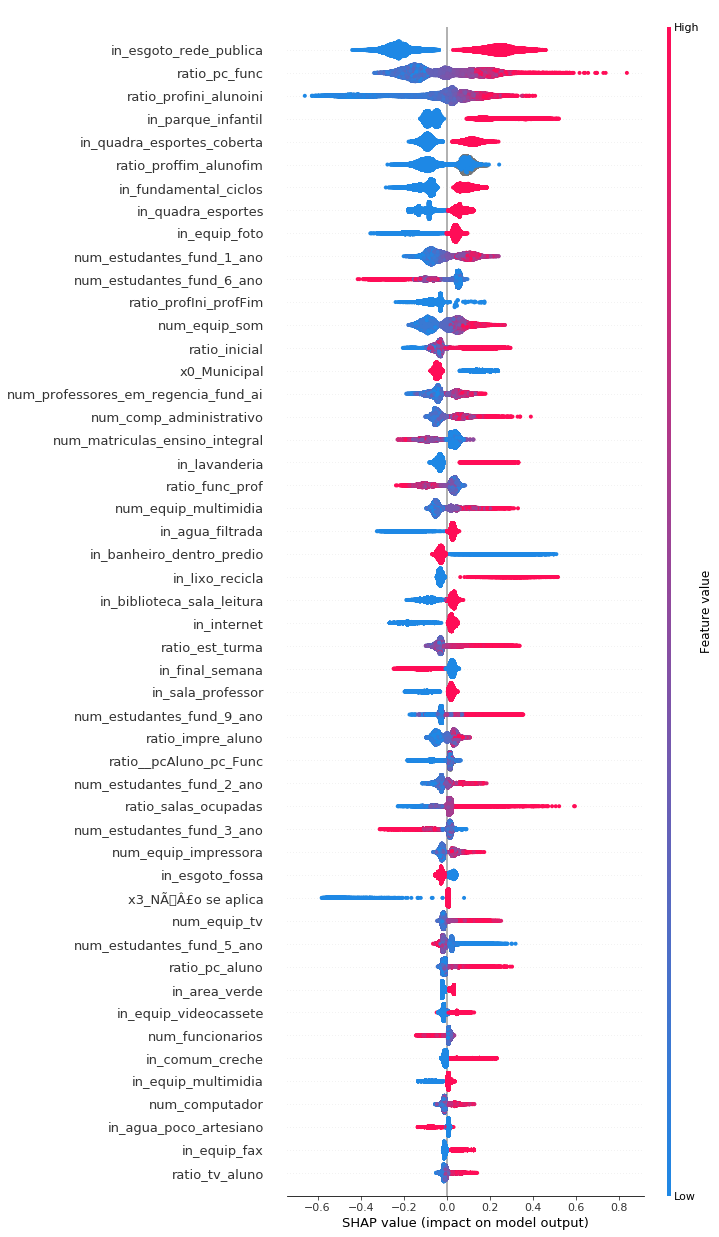

In [128]:
shap.summary_plot(shap_values, X, max_display=50)

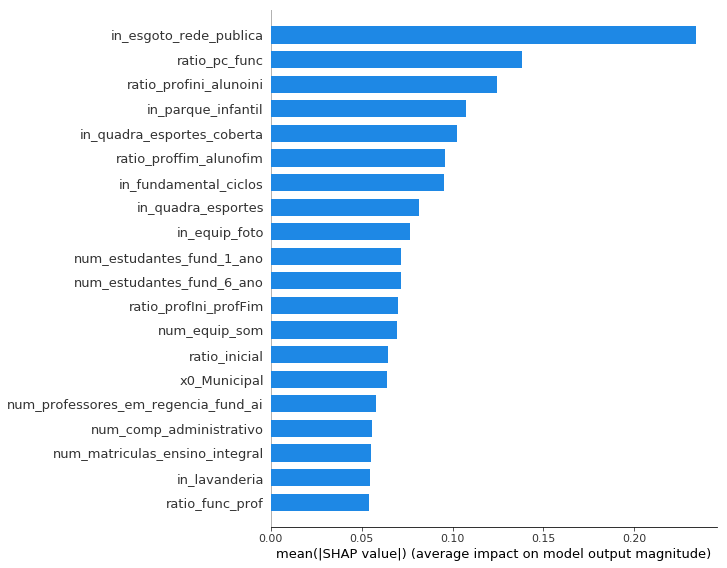

In [129]:
shap.summary_plot(shap_values, X, plot_type="bar")